In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('F:\\Data with Mo\\Python EDA\\crime.csv', encoding='windows-1252')

In [44]:
df.shape

(319050, 17)

In [4]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [5]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [7]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [8]:
# Summary information on numeric columns

df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [9]:
# Summary information on non-numeric columns

df.describe(include='object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319073,319073,319073,317308,319073,1019,319073,319073,318983,308202,319073
unique,282517,67,244,12,879,1,233229,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,2017-06-01 00:00:00,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49945,20250,1019,29,48495,158553,14194,19999


In [10]:
# Found duplicate rows and kept only the first occurrence

duplicates = df.duplicated()
    
df.drop_duplicates(keep = 'first', inplace=True)

In [11]:
# Coverted format from object to datetime

df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

In [12]:
df['OCCURRED_ON_DATE'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [13]:
 df['OCCURRED_ON_DATE'].dt.month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [14]:
df['OCCURRED_ON_DATE'].dt.isocalendar().week

0         35
1         34
2         36
3         36
4         36
          ..
319068    22
319069    28
319070    28
319071    22
319072    26
Name: week, Length: 319050, dtype: UInt32

In [15]:
df['OCCURRED_ON_DATE'].dt.hour

0         13
1          0
2         19
3         21
4         21
          ..
319068    17
319069    13
319070    13
319071    19
319072     0
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [16]:
df['OCCURRED_ON_DATE'].dt.minute

0          0
1          0
2         27
3         16
4          5
          ..
319068    25
319069    38
319070    38
319071    35
319072    12
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [17]:
# Columns with missing values

df.columns[df.isna().sum() != 0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [18]:
# Columns with no missing values

df.columns[df.isna().sum() == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [19]:
# Unique values in each column

df.nunique()

INCIDENT_NUMBER        282517
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            879
SHOOTING                    1
OCCURRED_ON_DATE       233229
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4657
Lat                     18178
Long                    18178
Location                18194
dtype: int64

In [20]:
#Top 10 offense group

df['OFFENSE_CODE_GROUP'].value_counts()[:10]

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 offense groups as % of all crimes')

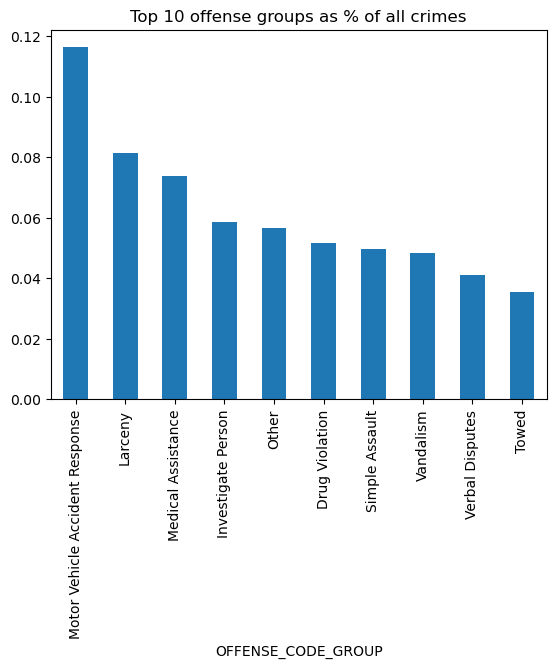

In [21]:
# Plotting a bar chart of top 10 offense groups as percentage of all crimes

(df['OFFENSE_CODE_GROUP'].value_counts()[:10]/df.shape[0]).plot(kind='bar')
plt.title('Top 10 offense groups as % of all crimes')

In [22]:
# Least 10 offense group

df['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending=True)[:10]

OFFENSE_CODE_GROUP
Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: count, dtype: int64

In [41]:
#Top 10 offense descriptions

df['OFFENSE_DESCRIPTION'].value_counts()[:10]

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 offense descriptions as % of all crimes')

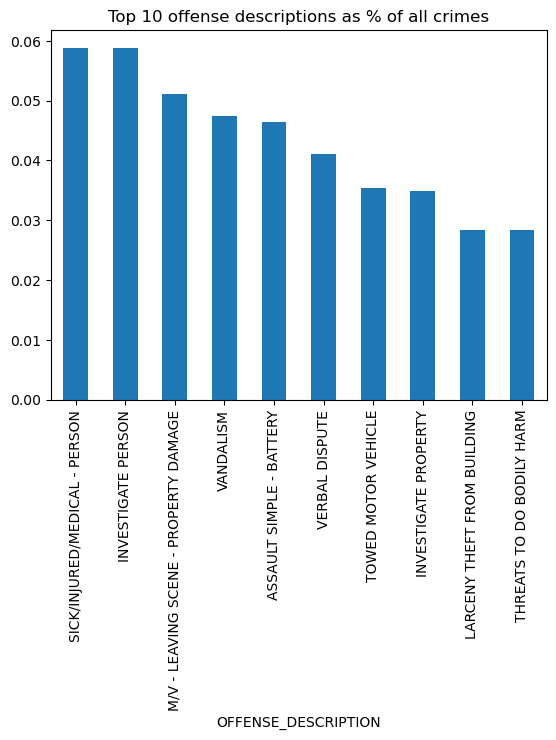

In [24]:
# Plotting a bar chart of top 10 offense descriptions as percentage of all crimes

(df['OFFENSE_DESCRIPTION'].value_counts()[:10]/df.shape[0]).plot(kind='bar')
plt.title('Top 10 offense descriptions as % of all crimes')

Text(0.5, 1.0, 'Number of Crimes')

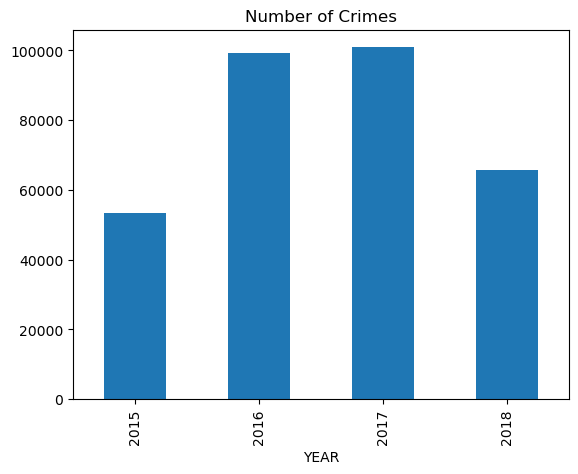

In [25]:
# Number of crimes per year

df.groupby('YEAR')['INCIDENT_NUMBER'].count().plot(kind='bar')
plt.title('Number of Crimes')

<Axes: xlabel='OCCURRED_ON_DATE'>

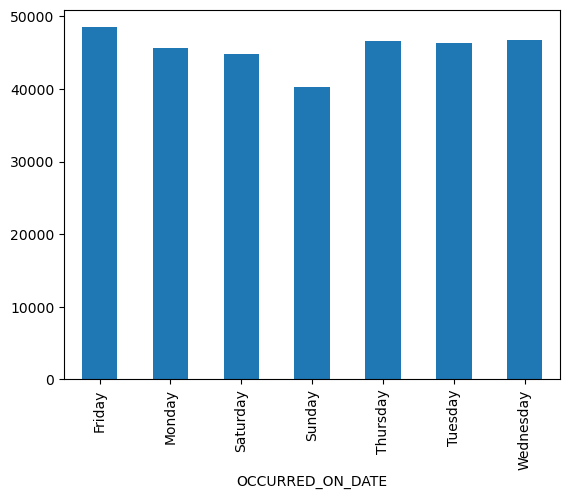

In [26]:
# Plotting a bar chart of crimes committed per week day


df.groupby(df['OCCURRED_ON_DATE'].dt.day_name())['INCIDENT_NUMBER'].count().plot(kind='bar')

<Axes: xlabel='HOUR'>

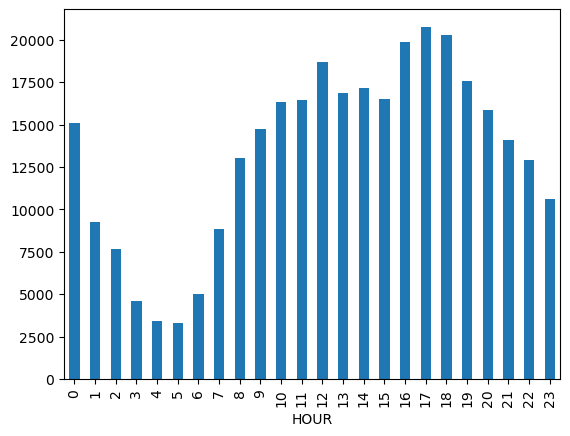

In [27]:
# Plotting a bar chart of crimes committed per hour of day


df.groupby('HOUR')['INCIDENT_NUMBER'].count().plot(kind='bar')


In [28]:
week_and_hour=df.groupby(['HOUR','DAY_OF_WEEK'])['INCIDENT_NUMBER'].count().unstack()

In [29]:
week_and_hour.columns=['Monday','Tuesday','Wednesday','Thursaday','Friday','Saturday','Sunday']

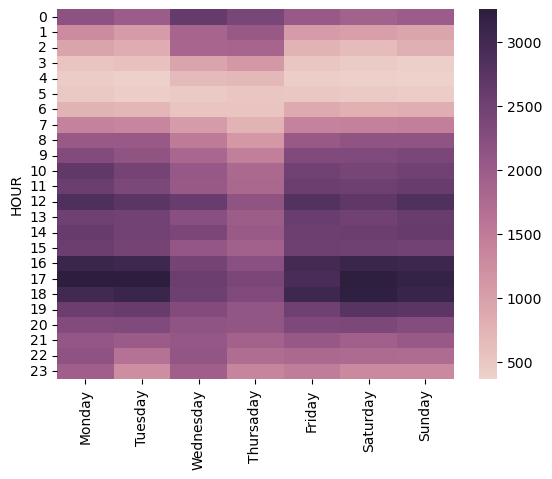

In [30]:
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True));

In [43]:
monthly_crimes = df.groupby('MONTH')['INCIDENT_NUMBER'].agg('count') 

In [32]:
# Months in which number of crimes was below average

monthly_crimes < monthly_crimes.mean()

MONTH
1      True
2      True
3      True
4      True
5      True
6     False
7     False
8     False
9      True
10     True
11     True
12     True
Name: INCIDENT_NUMBER, dtype: bool

In [33]:
# Which months in average most crimes occured

(monthly_crimes/monthly_crimes.sum()*100).round(2)

MONTH
1      7.40
2      6.79
3      7.57
4      7.55
5      8.21
6      9.58
7     10.83
8     10.91
9      8.32
10     8.07
11     7.42
12     7.36
Name: INCIDENT_NUMBER, dtype: float64

In [39]:
# In which districts were the most crimes committed on yearly basis

incidents_count = df.groupby(['DISTRICT','YEAR'])['INCIDENT_NUMBER'].count().unstack()

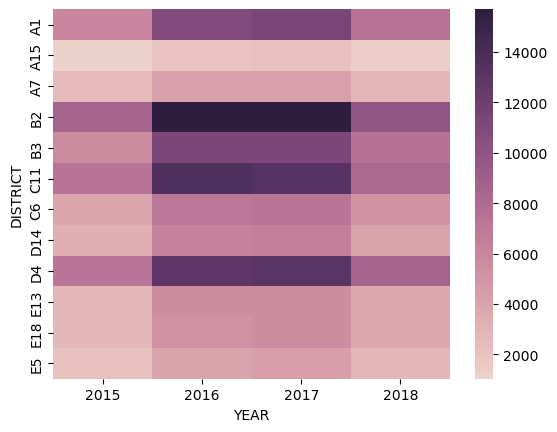

In [40]:
sns.heatmap(incidents_count, cmap=sns.cubehelix_palette(as_cmap=True));